Challenge:

Faça de conta que você trabalha para a agência de inteligência do seu país (NSA nos EUA, Abin no Brasil, etc). 
Seu chefe, que se reporta ao presidente, forneceu alguns dados e pediu que você elaborasse um relatório.

Dado este conjunto de dados (deste repositório ), produza um pequeno relatório (3-4 páginas)
 que informe seu chefe sobre informações importantes e relevantes que você aprendeu com a mineração.

Seu relatório deve ser escrito em prosa e pode conter tabelas e gráficos conforme necessário, 
desde que as imagens acompanhem uma descrição. 
O relatório deve ser compreensível por um gerente de nível superior que não entende de estatística, 
aprendizado de máquina ou muito jargão técnico. 

Use seu bom senso para decidir o que é importante incluir com base no que você acha que seria do interesse de seu chefe e de seu país 
em relação a ataques cibernéticos.


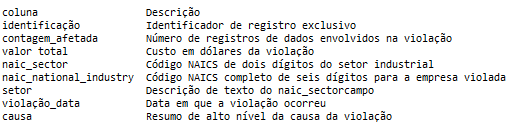

In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot   as plt
from IPython.core.display  import HTML
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 0.0 Importação dos Dados

In [ ]:
df = pd.read_csv('/content/sample_breaches.csv')   

In [ ]:
df.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,1,15,10269,44.0,446110.0,Retail,2014-10-26,Internal - Other
1,2,39,332165,61.0,611210.0,Education,2020-08-17,Internal - Consultant
2,3,90,4473,56.0,561790.0,Administrative,2019-11-15,External - Other
3,4,10,1471919,54.0,541715.0,Professional,2011-04-09,Internal - Trusted Third Party (TTP)
4,5,1,3986,92.0,926130.0,Public,2019-03-31,Internal - Trusted Third Party (TTP)


# 1.0 Descrição dos Dados

## 1.1 Dimensão dos Dados

In [ ]:
print( 'Linhas: {}'.format( df.shape[0]))
print( 'Colunas: {}'.format( df.shape[1]))

Linhas: 10000
Colunas: 8


## 1.2 Tipo dos Dados

In [ ]:
df.dtypes

id                          int64
affected_count              int64
total_amount                int64
naic_sector               float64
naic_national_industry    float64
sector                     object
breach_date                object
cause                      object
dtype: object

## 1.3 Mudar tipo dos Dados

In [ ]:
df['breach_date'] = pd.to_datetime(df['breach_date'])

## 1.4 Check Na

In [ ]:
df.isna().sum()

id                          0
affected_count              0
total_amount                0
naic_sector               135
naic_national_industry    135
sector                    135
breach_date                 0
cause                     706
dtype: int64

## 1.5 Quantidade de Valores Unicos

In [ ]:
## Números de ID ####
print('Números de Identificações: {}'.format(len(df['id'].unique())))

## Naic Sector ###
print('Números de Códigos Naic: {}'.format(len(df['naic_sector'].unique())))
print('\nCódigos Naic: {}'.format(df['naic_sector'].unique()))

## Naic National Industry ###
print('\nNúmeros de Códigos Naic Completos: {}'.format(len(df['naic_national_industry'].unique())))

## Sector ###
print('Números de Sector: {}'.format(len(df['sector'].unique())))
print('\nSectors: {}'.format(df['sector'].unique()))

## Cause ###
print('\nNúmeros de Cause: {}'.format(len(df['cause'].unique())))

Números de Identificações: 10000
Números de Códigos Naic: 25

Códigos Naic: [44. 61. 56. 54. 92. 62. 51. 32. 52. 23. 55. 81. 42. 72. nan 33. 31. 48.
 71. 53. 45. 11. 22. 21. 49.]

Números de Códigos Naic Completos: 702
Números de Sector: 21

Sectors: ['Retail' 'Education' 'Administrative' 'Professional' 'Public'
 'Healthcare' 'Information' 'Manufacturing' 'Financial' 'Construction'
 'Management' 'Other' 'Trade' 'Hospitality' nan 'Transportation'
 'Entertainment' 'Real Estate' 'Agriculture' 'Utilities' 'Mining']

Números de Cause: 14


## 1.6 Dados Faltantes 

In [ ]:
### Cause ###
df['cause'].fillna("Unassessed - Unassessed", inplace=True)

## Splitando coluna "Cause" ## 
cause_split = df["cause"].str.split(" - ", n=1, expand=True)
df["local"] = cause_split[0]
df["cause_detail"] = cause_split[1]
df.drop(columns=["cause"], inplace=True)

### Sector ###
df['sector'].fillna("Uninformed", inplace=True)

### NAIC ###
df['naic_sector'].fillna(0.0 , inplace=True)

### NAIC 6 ###
df['naic_national_industry'].fillna(000000 , inplace=True)

## 1.7 Criação de novas Features - Datas

In [ ]:
### Criando nova Features para datas ###

#year
df['year'] = df['breach_date'].dt.year

#month
df['month'] = df['breach_date'].dt.month

#day
df['day'] = df['breach_date'].dt.day

#week of year
df['week_of_year'] = df['breach_date'].dt.weekofyear

#year week
df['year_week'] = df['breach_date'].dt.strftime('%Y-%W')

# 2.0 EDA


In [ ]:
df2 = df.copy()

### Planejamento da Analíse 



1. Affected_count:
- 1.1 Valor total dos registro de dados violados
- 1.2 Affected_count x Naic_Sector 
- 1.3 Affected_count x Sector 
- 1.4 Affected_count x Sector x Naic_Sector
- 1.5 Affected_count x Date 
- 1.6 Affected_count x Local 
- 1.7 Affected_count x Cause_Detail
- 1.8 Affected_count x Local x Cause Detail

2. Total_Amount:
- 1.1 Valor total do custo das violações(US$)
- 1.2 Total_Amount x Naic_Sector 
- 1.3 Total_Amount x Sector 
- 1.4 Total_Amount x Sector x Naic_Sector
- 1.5 Total_Amount x Date 
- 1.6 Total_Amount x Local 
- 1.7 Total_Amount x Cause_Detail
- 1.8 Total_Amount x Local x Cause Detail

3. Naic_Sector
- 3.1 Distribuição

4. Sector
- 4.1 Distribuição 

5. Breach_date
- 5.1 Data inicial
- 5.2 Data final
- 5.3 Quantidade de registros por ano, mês.

6. Local
- 6.1 Distribuição 
7. Cause_Detail
- 7.1 Distribuição 

## 4.1 Affected_Count

In [ ]:
# 1
print('Número total de dados violados: {}'.format( df2['affected_count'].sum()))

Número total de dados violados: 190308515


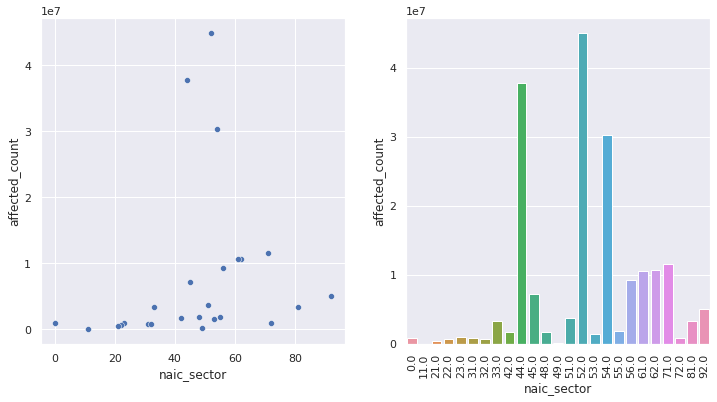

In [ ]:
# 2 Affected_count x Naic_Sector
a = df2[['affected_count','naic_sector']].groupby( 'naic_sector').sum().reset_index().sort_values('affected_count', ascending=False)

plt.subplot(1,2,1)
sns.scatterplot(x='naic_sector',y='affected_count',data=a);

plt.subplot(1,2,2)
sns.barplot(x='naic_sector',y='affected_count',data=a);
plt.xticks(rotation=90);

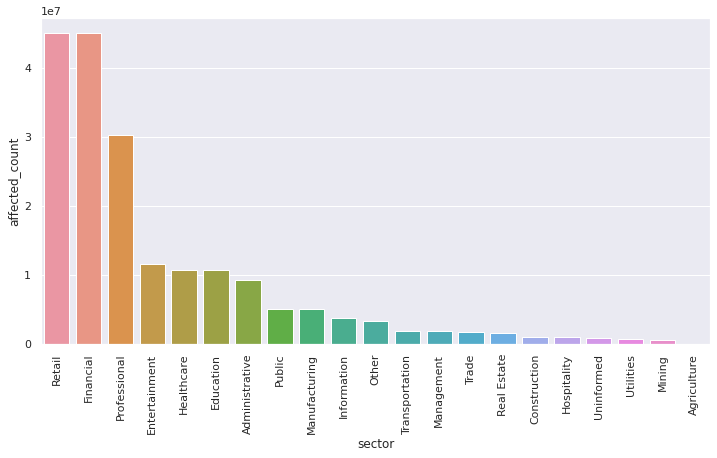

In [ ]:
# 3 Affected_count x Sector

b = df2[['affected_count','sector']].groupby( 'sector').sum().reset_index().sort_values('affected_count', ascending=False)

sns.barplot(x='sector',y='affected_count',data=b);
plt.xticks(rotation=90);

In [ ]:
# 4 Affected_count x Sector x Naic_Sector
c = df2[['affected_count','naic_sector','sector']].groupby( ['naic_sector','sector']).sum().reset_index().sort_values('affected_count', ascending=False)
c.head(10)

,naic_sector,sector,affected_count
14,52.0,Financial,44977127
9,44.0,Retail,37781087
16,54.0,Professional,30285087
21,71.0,Entertainment,11593706
20,62.0,Healthcare,10697292
19,61.0,Education,10611953
18,56.0,Administrative,9231331
10,45.0,Retail,7234734
24,92.0,Public,4996413
13,51.0,Information,3733558


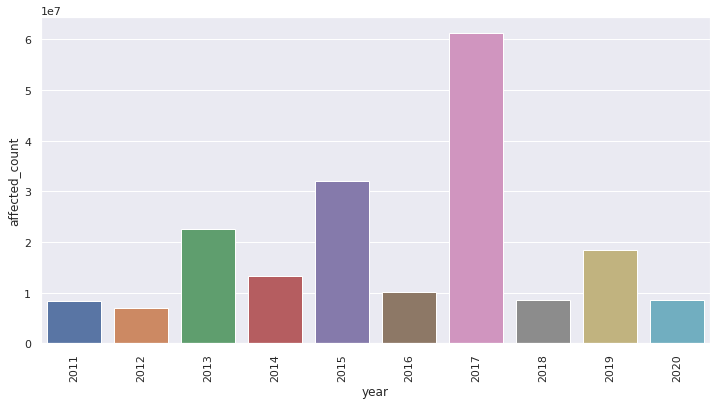

In [ ]:
# 5 Affected_count x Date
d = df2[['affected_count','year']].groupby( 'year').sum().reset_index().sort_values('year', ascending=False)

sns.barplot(x='year',y='affected_count',data=d);
plt.xticks(rotation=90);

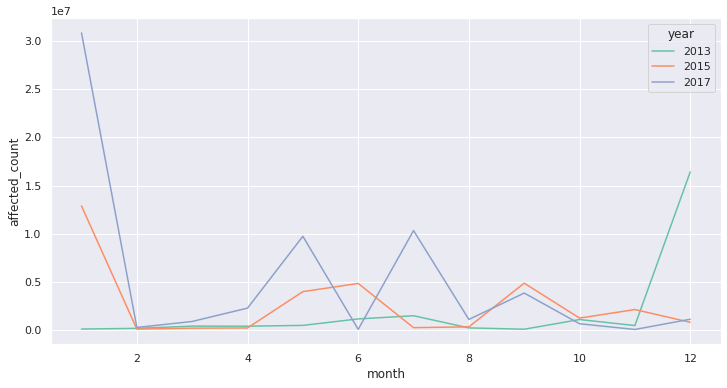

In [ ]:
# Análise Detalhada - 2013, 2015 e 2017
df2e = df2[(df2['year'] == 2013) | (df2['year'] == 2015) | (df2['year'] == 2017) ]
e = df2e[['affected_count', 'year','month']].groupby([ 'year','month']).sum().reset_index().sort_values(by=['year','month'], ascending=True)
sns.lineplot(data=e, x="month", y="affected_count", hue="year" , palette='Set2' );

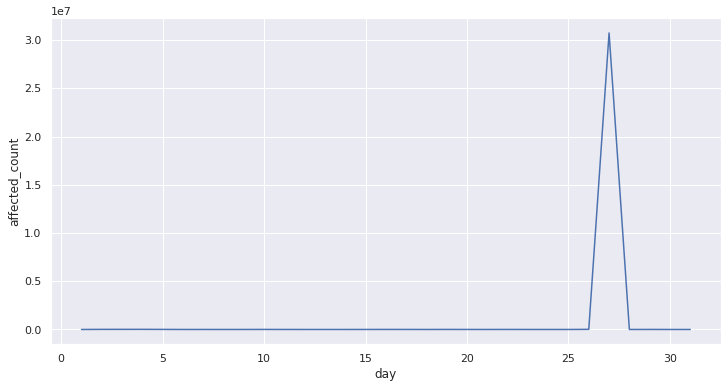

In [ ]:
df2f = df2[(df2['year'] == 2017) & (df2['month'] == 1 )]
f = df2f[['affected_count','day']].groupby('day').sum().reset_index()
sns.lineplot(data=f, x="day", y="affected_count" , palette='Set2' );

In [ ]:
f.sort_values('affected_count',ascending=False)

print('O dia 27 representa {:.2f}% do total de Dados violados do mês 12/2017'.format( 100* (f['affected_count'][f['day'] == 27].sum()) / (df2f['affected_count'].sum() ) ))

O dia 27 representa 99.77% do total de Dados violados do mês 12/2017


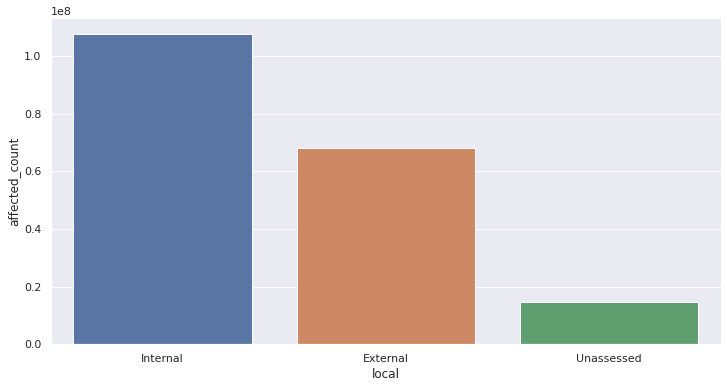

In [ ]:
# 6 Affected_count x Local

g = df2[['affected_count','local']].groupby( 'local').sum().reset_index().sort_values('affected_count', ascending=False)

sns.barplot(x='local',y='affected_count',data=g);

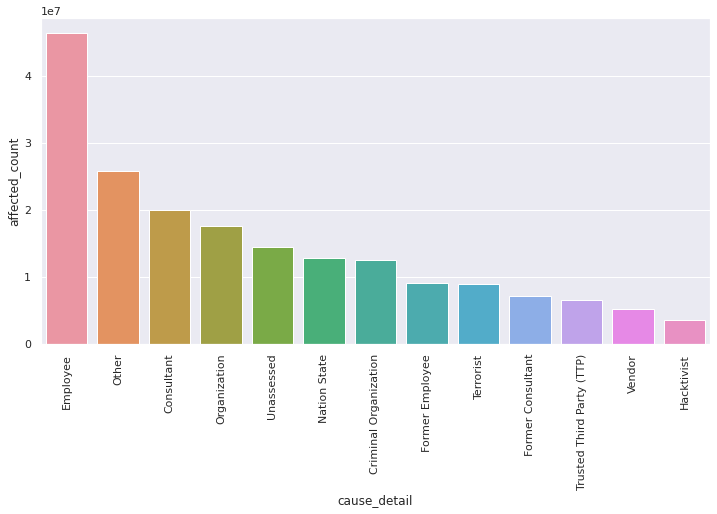

In [ ]:
# 7 Affected_count x Cause_detail

h = df2[['affected_count','cause_detail']].groupby( 'cause_detail').sum().reset_index().sort_values('affected_count', ascending=False)

sns.barplot(x='cause_detail',y='affected_count',data=h);
plt.xticks(rotation=90);

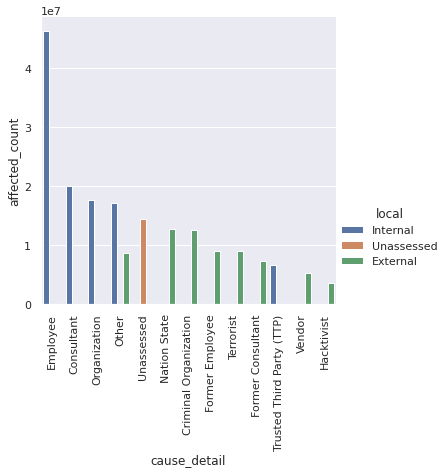

In [ ]:
# 8 Affected_count x Cause_detail x Local

i = df2[['affected_count','local','cause_detail']].groupby( ['local','cause_detail']).sum().reset_index().sort_values('affected_count', ascending=False)

sns.catplot( x='cause_detail', y='affected_count', hue='local', kind='bar', data=i);
plt.xticks(rotation=90);

## 4.2 Total Amount

In [ ]:
# 1
print('Custo total das violações: US${}'.format( float(df2['total_amount'].sum())))

Custo total das violações: US$46617391324.0


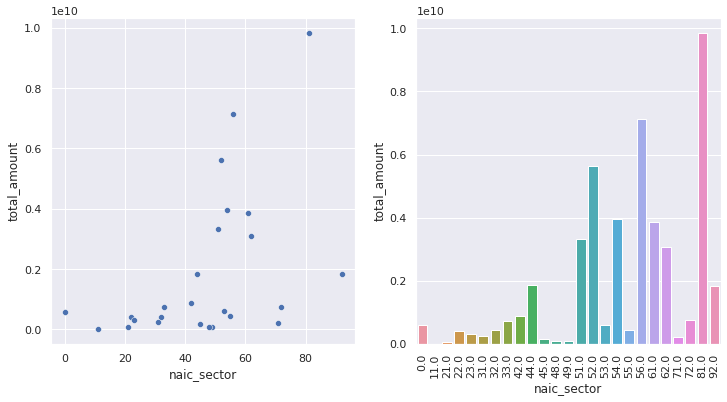

In [ ]:
# 2 total_amount x Naic_Sector
j = df2[['total_amount','naic_sector']].groupby( 'naic_sector').sum().reset_index().sort_values('total_amount', ascending=False)

plt.subplot(1,2,1)
sns.scatterplot(x='naic_sector',y='total_amount',data=j);

plt.subplot(1,2,2)
sns.barplot(x='naic_sector',y='total_amount',data=j);
plt.xticks(rotation=90);

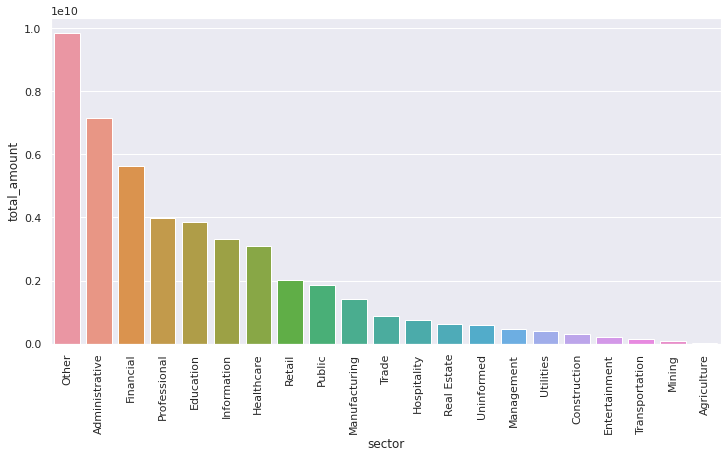

In [ ]:
# 3 total_amount x Sector

k = df2[['total_amount','sector']].groupby( 'sector').sum().reset_index().sort_values('total_amount', ascending=False)

sns.barplot(x='sector',y='total_amount',data=k);
plt.xticks(rotation=90);

In [ ]:
# 4 total_amount x Sector x Naic_Sector
l = df2[['total_amount','naic_sector','sector']].groupby( ['naic_sector','sector']).sum().reset_index().sort_values('total_amount', ascending=False)
l.head(10)

,naic_sector,sector,total_amount
23,81.0,Other,9840889832
18,56.0,Administrative,7139324569
14,52.0,Financial,5633009579
16,54.0,Professional,3972471086
19,61.0,Education,3865529928
13,51.0,Information,3323897320
20,62.0,Healthcare,3086160686
9,44.0,Retail,1851477089
24,92.0,Public,1850651416
8,42.0,Trade,884154936


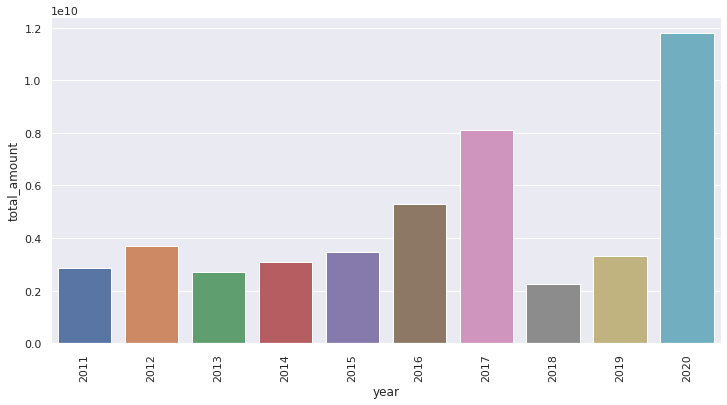

In [ ]:
# 5 total_amount x Date
m = df2[['total_amount','year']].groupby( 'year').sum().reset_index().sort_values('year', ascending=False)

sns.barplot(x='year',y='total_amount',data=m);
plt.xticks(rotation=90);


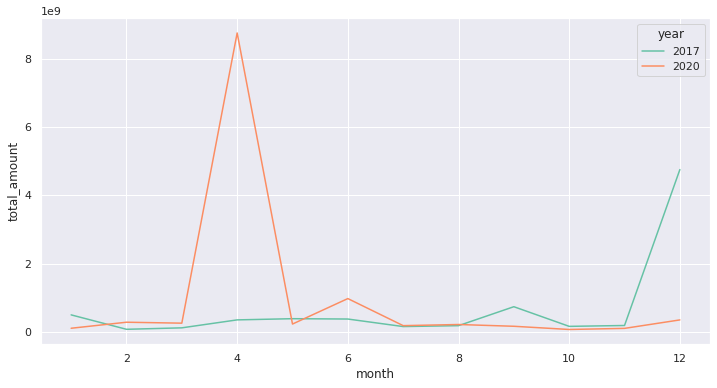

In [ ]:
# Análise Detalhada - 2017 e 2020
df2n = df2[(df2['year'] == 2017) | (df2['year'] == 2020) ]
n = df2n[['total_amount', 'year','month']].groupby([ 'year','month']).sum().reset_index().sort_values(by=['year','month'], ascending=True)
sns.lineplot(data=n, x="month", y="total_amount", hue="year" , palette='Set2' );


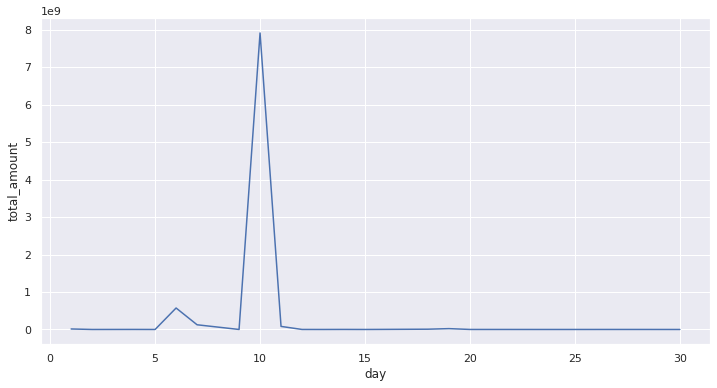

In [ ]:
df2o = df2[(df2['year'] == 2020) & (df2['month'] == 4 )]
o = df2o[['total_amount','day']].groupby('day').sum().reset_index()
sns.lineplot(data=o, x="day", y="total_amount" , palette='Set2' );

In [ ]:
o.sort_values('total_amount',ascending=False)

print('O dia 10 representa {:.2f}% do total de Dados violados do mês 04/2020'.format( 100* (o['total_amount'][o['day'] == 10].sum()) / (df2n['total_amount'].sum() ) ))

O dia 10 representa 39.77% do total de Dados violados do mês 04/2020


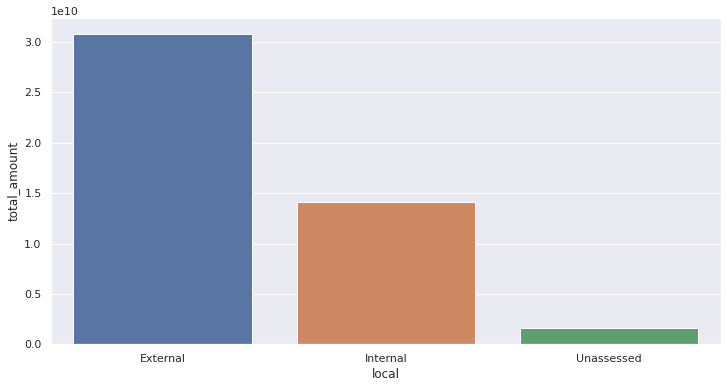

In [ ]:
# 6 total_amount x Local

p = df2[['total_amount','local']].groupby( 'local').sum().reset_index().sort_values('total_amount', ascending=False)

sns.barplot(x='local',y='total_amount',data=p);


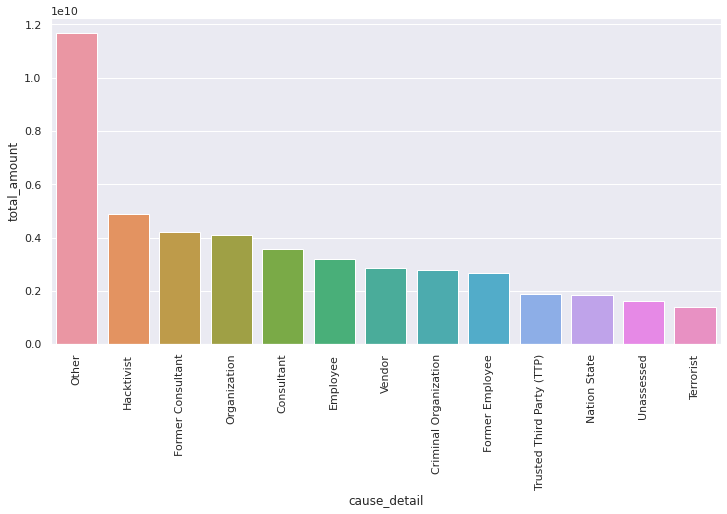

In [ ]:
# 7 total_amount x Cause_detail

r = df2[['total_amount','cause_detail']].groupby( 'cause_detail').sum().reset_index().sort_values('total_amount', ascending=False)

sns.barplot(x='cause_detail',y='total_amount',data=r);
plt.xticks(rotation=90);

## 4.3 NAIC Sector e Sector

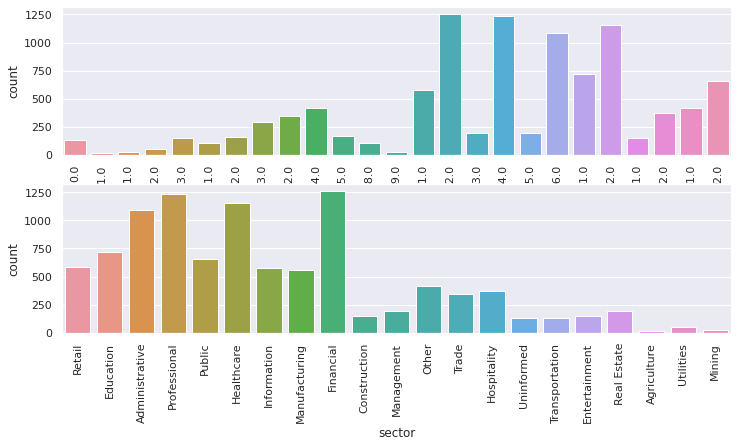

In [ ]:
# NAIC
plt.subplot(2,1,1)
sns.countplot(df2['naic_sector']);
plt.xticks(rotation=90);

# Sector
plt.subplot(2,1,2)
sns.countplot(df2['sector']);
plt.xticks(rotation=90);

## 4.4 Breach Date

In [ ]:
# Data Inicial
print('Data inicial dos registros {}'.format(df2['breach_date'].min().strftime("%d/%m/%Y")))

# Data Final
print('Data final dos registros {}'.format(df2['breach_date'].max().strftime("%d/%m/%Y")))

Data inicial dos registros 01/01/2011
Data final dos registros 31/12/2020


In [ ]:
df2.columns


Index(['id', 'affected_count', 'total_amount', 'naic_sector',
       'naic_national_industry', 'sector', 'breach_date', 'local',
       'cause_detail', 'year', 'month', 'day', 'week_of_year', 'year_week'],
      dtype='object')

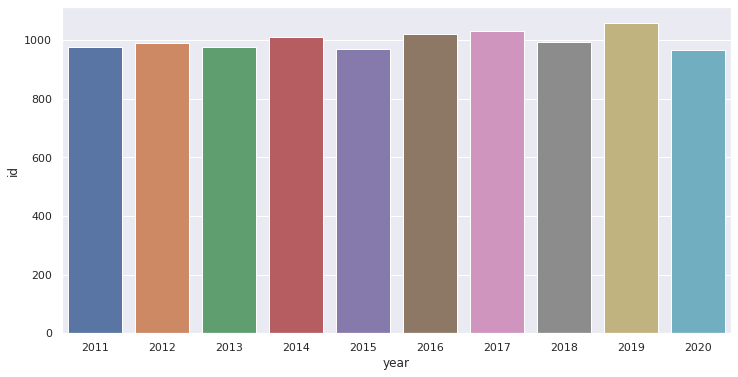

In [ ]:
reg_year = df2[['id','year']].groupby('year').count().reset_index()
sns.barplot( x='year', y='id', data=reg_year);

In [ ]:
# Ano com mais registros
reg_year = reg_year.sort_values('id', ascending=False).reset_index(drop=True)
print('O ano com maior número de registros foi {}'.format( reg_year['year'].head()[0] ))

O ano com maior número de registros foi 2019


## 4.5 Local e Cause Detail

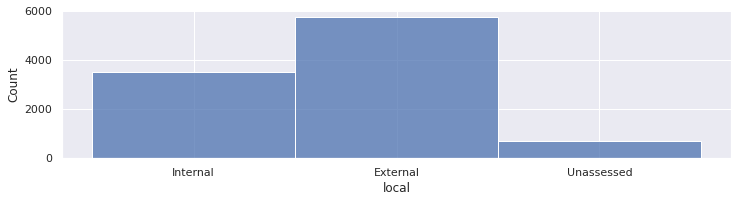

In [ ]:
# Local
plt.subplot(2,1,1)
sns.histplot(data=df2, x="local");

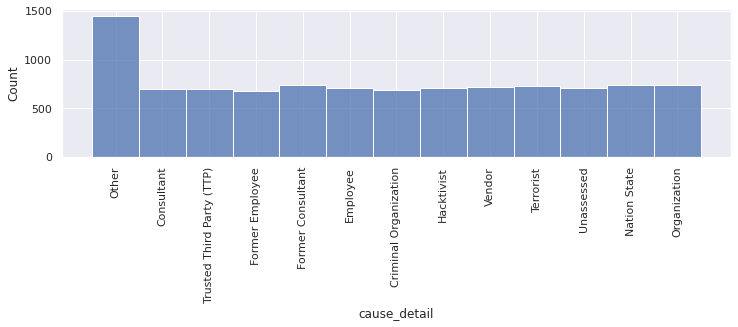

In [ ]:
# Cause Detail
plt.subplot(2,1,2)
sns.histplot(data=df2, x="cause_detail");
plt.xticks(rotation=90);